# Estrategias de Pricing: Disposición a pagar
**Método de Van Westendorp**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## Paquetes

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Caso
**Evaluación del Precio de un Buffet en Restaurante "La Sazón"**

El restaurante "La Sazón" ha lanzado recientemente un nuevo buffet gourmet con una amplia variedad de platos internacionales y opciones personalizadas para sus clientes. Con el fin de determinar el precio adecuado para maximizar la satisfacción del cliente y la rentabilidad, el restaurante realizó una encuesta a 347 de sus comensales frecuentes, quienes brindaron su opinión sobre lo que consideran un precio justo para el buffet.

**Un precio demasiado bajo podría generar incertidumbre sobre la calidad** del buffet, ya que los clientes podrían asociarlo con una menor frescura o variedad de los alimentos. La percepción de que el restaurante no está invirtiendo en la calidad de los ingredientes o en el servicio podría disminuir el atractivo del buffet, incluso si la oferta es amplia.

Por otro lado, **un precio excesivamente alto podría hacer que muchos clientes lo consideren inaccesible**. Esto podría generar la impresión de que el costo no se justifica por la oferta disponible, limitando el número de comensales y reduciendo la rentabilidad del restaurante. La clave está en encontrar un precio que refleje la calidad del servicio y la comida, mientras se mantiene accesible para la mayoría de los clientes sin generar la sensación de que el precio es desproporcionado.

## Cargar datos

In [33]:
df = pd.read_csv('buffet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cliente     347 non-null    object
 1   muy_barato  347 non-null    int64 
 2   barato      347 non-null    int64 
 3   caro        347 non-null    int64 
 4   muy_caro    347 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.7+ KB


El código usa `pd.melt` para transformar el DataFrame `df`, manteniendo la columna `'cliente'` como identificador y convirtiendo las demás columnas en dos nuevas columnas: una para el nombre de la variable y otra para su valor. Esto facilita un formato más largo y adecuado para análisis posteriores.

## Verticalizando la base

In [34]:
df_melt = pd.melt(df,id_vars=['cliente'])
df_melt

,cliente,variable,value
0,Cliente_1,muy_barato,25
1,Cliente_2,muy_barato,31
2,Cliente_3,muy_barato,11
3,Cliente_4,muy_barato,17
4,Cliente_5,muy_barato,30
...,...,...,...
1383,Cliente_343,muy_caro,47
1384,Cliente_344,muy_caro,53
1385,Cliente_345,muy_caro,39
1386,Cliente_346,muy_caro,56


Este código renombra las columnas 'variable' y 'value' de `df_melt` a 'etiqueta' y 'precio', respectivamente. Luego, muestra las primeras filas del DataFrame resultante con `head()`.

In [35]:
df_melt.rename(columns={'variable': 'etiqueta', 'value': 'precio'}, inplace=True)
df_melt.head()

,cliente,etiqueta,precio
0,Cliente_1,muy_barato,25
1,Cliente_2,muy_barato,31
2,Cliente_3,muy_barato,11
3,Cliente_4,muy_barato,17
4,Cliente_5,muy_barato,30


## Calculando frecuencia

El código crea una tabla dinámica con `pivot_table`, contando las ocurrencias de 'cliente' por 'etiqueta' y 'precio'. Luego, calcula la suma acumulada de la 'frecuencia' por 'etiqueta' y muestra las primeras filas del resultado.

In [36]:
df_melt2 = df_melt.pivot_table(index=['etiqueta','precio'],values='cliente',aggfunc='count').reset_index().rename(columns = {'cliente': 'frecuencia'}).copy()
df_melt2['suma_acum'] = df_melt2.groupby(['etiqueta'])['frecuencia'].cumsum()
df_melt2.head()

,etiqueta,precio,frecuencia,suma_acum
0,barato,9,2,2
1,barato,11,1,3
2,barato,14,1,4
3,barato,15,1,5
4,barato,16,3,8


El código calcula la suma total de `'frecuencia'` por `'etiqueta'` y luego calcula el porcentaje acumulado respecto a esa suma total. Finalmente, muestra las primeras filas del DataFrame resultante.

In [37]:
df_melt2['suma_total'] = df_melt2.groupby(['etiqueta'])['frecuencia'].transform('sum')
df_melt2['porcentaje'] = (df_melt2['suma_acum']/df_melt2['suma_total'])*100
df_melt2.head()

,etiqueta,precio,frecuencia,suma_acum,suma_total,porcentaje
0,barato,9,2,2,347,0.576369
1,barato,11,1,3,347,0.864553
2,barato,14,1,4,347,1.152738
3,barato,15,1,5,347,1.440922
4,barato,16,3,8,347,2.305476


El código crea una tabla dinámica con `pivot_table` para reorganizar los datos, colocando los 'porcentajes' por 'precio' y 'etiqueta'. Luego, restablece el índice y muestra las primeras filas del DataFrame resultante.

In [38]:
df_final = df_melt2.pivot_table(values='porcentaje', index='precio', columns='etiqueta')
df_final.reset_index(inplace=True)
df_final.head()

etiqueta,precio,barato,caro,muy_barato,muy_caro
0,1,NaN,NaN,0.288184,NaN
1,2,NaN,NaN,0.576369,NaN
2,3,NaN,NaN,0.864553,NaN
3,4,NaN,NaN,1.152738,NaN
4,6,NaN,NaN,1.440922,NaN


## Interpolando datos

El código interpola los valores faltantes y reemplaza los NaN con 0. Luego, ajusta las columnas 'muy_barato' y 'barato' restando sus valores de 100, y muestra las primeras filas del DataFrame actualizado.

In [39]:
df_final = df_final.interpolate().fillna(0).copy()
df_final['muy_barato'] = 100 - df_final['muy_barato']
df_final['barato'] = 100 - df_final['barato']
df_final.head()

etiqueta,precio,barato,caro,muy_barato,muy_caro
0,1,100.0,0.0,99.711816,0.0
1,2,100.0,0.0,99.423631,0.0
2,3,100.0,0.0,99.135447,0.0
3,4,100.0,0.0,98.847262,0.0
4,6,100.0,0.0,98.559078,0.0


## Tabla final

El código calcula las diferencias entre las percepciones de precio de diferentes categorías: la diferencia entre 'muy_barato' y 'muy_caro' (optimo_dif), la diferencia entre 'muy_barato' y 'caro' (izq_dif), y la diferencia entre 'muy_caro' y 'barato' (der_dif). Esto ayuda a identificar el precio óptimo y los límites de precios aceptables.

In [40]:
df_final['optimo_dif'] = df_final['muy_barato'] - df_final['muy_caro']
df_final['izq_dif'] = df_final['muy_barato'] - df_final['caro']
df_final['der_dif'] = df_final['muy_caro'] - df_final['barato']
df_final.head()

etiqueta,precio,barato,caro,muy_barato,muy_caro,optimo_dif,izq_dif,der_dif
0,1,100.0,0.0,99.711816,0.0,99.711816,99.711816,-100.0
1,2,100.0,0.0,99.423631,0.0,99.423631,99.423631,-100.0
2,3,100.0,0.0,99.135447,0.0,99.135447,99.135447,-100.0
3,4,100.0,0.0,98.847262,0.0,98.847262,98.847262,-100.0
4,6,100.0,0.0,98.559078,0.0,98.559078,98.559078,-100.0


El código determina el **precio óptimo** como el primer precio donde la diferencia entre 'muy_barato' y 'muy_caro' es menor o igual a 0. Luego, calcula el **límite inferior** (donde la diferencia entre 'muy_barato' y 'caro' es menor o igual a 0) y el **límite superior** (donde la diferencia entre 'muy_caro' y 'barato' es mayor o igual a 0).

In [41]:
precio_optimo = df_final[df_final['optimo_dif'] <= 0]['precio'].iloc[0]
lim_inf = df_final[df_final['izq_dif'] <= 0]['precio'].iloc[0]
lim_sup = df_final[df_final['der_dif'] >= 0]['precio'].iloc[0]

In [42]:
print(f'Precio óptimo: ${precio_optimo}')
print(f'Rango de precios aceptable: ${lim_inf} a ${lim_sup}')

Precio óptimo: $32
Rango de precios aceptable: $29 a $37


## Visualizacion

El código genera un gráfico de líneas que muestra las percepciones de precio ('muy barato', 'barato', 'caro', 'muy caro') a lo largo de diferentes precios. También se agregan líneas verticales para resaltar el **precio óptimo** y los **límites inferior y superior**. El gráfico incluye un título, etiquetas en los ejes, leyenda y una cuadrícula para mejorar la visualización.

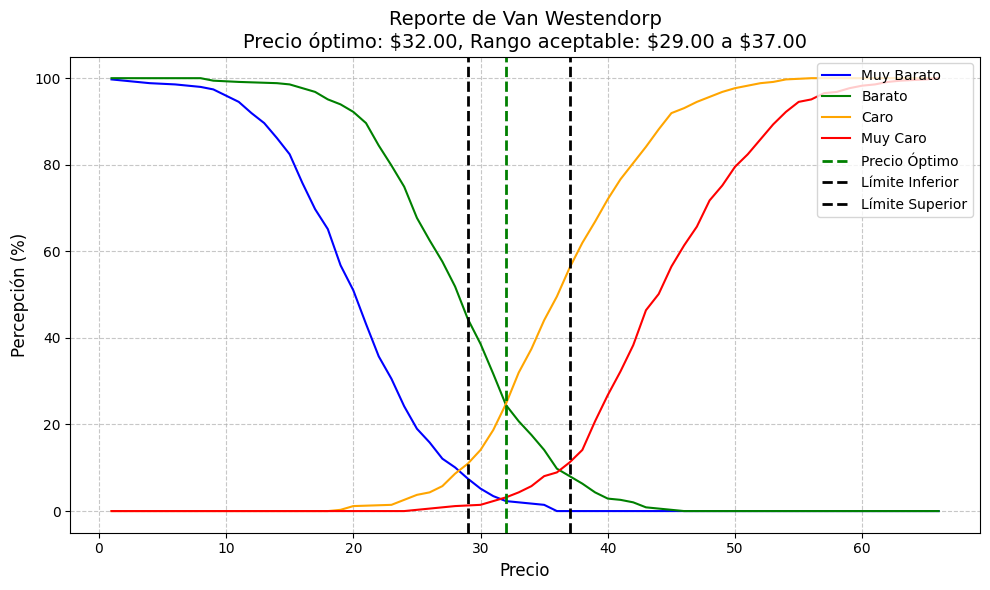

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_final['precio'], df_final['muy_barato'], label='Muy Barato', color='blue', linestyle='solid')
ax.plot(df_final['precio'], df_final['barato'], label='Barato', color='green', linestyle='solid')
ax.plot(df_final['precio'], df_final['caro'], label='Caro', color='orange', linestyle='solid')
ax.plot(df_final['precio'], df_final['muy_caro'], label='Muy Caro', color='red', linestyle='solid')

ax.axvline(x=precio_optimo, color='green', linestyle='--', linewidth=2, label='Precio Óptimo')
ax.axvline(x=lim_inf, color='black', linestyle='--', linewidth=2, label='Límite Inferior')
ax.axvline(x=lim_sup, color='black', linestyle='--', linewidth=2, label='Límite Superior')

titulo = f"Reporte de Van Westendorp\nPrecio óptimo: ${precio_optimo:.2f}, Rango aceptable: ${lim_inf:.2f} a ${lim_sup:.2f}"
ax.set_title(titulo, fontsize=14)

ax.set_xlabel('Precio', fontsize=12)
ax.set_ylabel('Percepción (%)', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Automatizando el proceso

La función `Van_Westendorp` automatiza todo el proceso de análisis de precios utilizando el método de Van Westendorp. Recibe un DataFrame con información de clientes y sus percepciones de precios. El flujo de trabajo incluye la preparación de los datos (melt, pivot, cálculos de frecuencias acumuladas), el cálculo de los precios óptimos y los límites de rango aceptable, y la visualización de los resultados en un gráfico.

La función devuelve un diccionario con los valores del **precio óptimo** y los **límites inferior y superior** del rango de precios aceptable. Además, imprime estos valores y genera un gráfico con las percepciones de precio ("muy barato", "barato", "caro", "muy caro") en función del precio.

In [44]:
def Van_Westendorp(df):
  import pandas as pd
  import matplotlib.pyplot as plt
  df_melt = pd.melt(df,id_vars=['cliente'])
  df_melt.rename(columns={'variable': 'etiqueta', 'value': 'precio'}, inplace=True)
  df_melt2 = df_melt.pivot_table(index=['etiqueta','precio'],values='cliente',aggfunc='count').reset_index().rename(columns = {'cliente': 'frecuencia'}).copy()
  df_melt2['suma_acum'] = df_melt2.groupby(['etiqueta'])['frecuencia'].cumsum()
  df_melt2['suma_total'] = df_melt2.groupby(['etiqueta'])['frecuencia'].transform('sum')
  df_melt2['porcentaje'] = (df_melt2['suma_acum']/df_melt2['suma_total'])*100
  df_final = df_melt2.pivot_table(values='porcentaje', index='precio', columns='etiqueta')
  df_final.reset_index(inplace=True)
  df_final = df_final.interpolate().fillna(0).copy()
  df_final['muy_barato'] = 100 - df_final['muy_barato']
  df_final['barato'] = 100 - df_final['barato']
  df_final['optimo_dif'] = df_final['muy_barato'] - df_final['muy_caro']
  df_final['izq_dif'] = df_final['muy_barato'] - df_final['caro']
  df_final['der_dif'] = df_final['muy_caro'] - df_final['barato']
  precio_optimo = df_final[df_final['optimo_dif'] <= 0]['precio'].iloc[0]
  lim_inf = df_final[df_final['izq_dif'] <= 0]['precio'].iloc[0]
  lim_sup = df_final[df_final['der_dif'] >= 0]['precio'].iloc[0]
  print(f'Precio óptimo: ${precio_optimo}')
  print(f'Rango de precios aceptable: ${lim_inf} a ${lim_sup}')

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(df_final['precio'], df_final['muy_barato'], label='Muy Barato', color='blue', linestyle='solid')
  ax.plot(df_final['precio'], df_final['barato'], label='Barato', color='green', linestyle='solid')
  ax.plot(df_final['precio'], df_final['caro'], label='Caro', color='orange', linestyle='solid')
  ax.plot(df_final['precio'], df_final['muy_caro'], label='Muy Caro', color='red', linestyle='solid')
  ax.axvline(x=precio_optimo, color='green', linestyle='--', linewidth=2, label='Precio Óptimo')
  ax.axvline(x=lim_inf, color='black', linestyle='--', linewidth=2, label='Límite Inferior')
  ax.axvline(x=lim_sup, color='black', linestyle='--', linewidth=2, label='Límite Superior')
  titulo = f"Reporte de Van Westendorp\nPrecio óptimo: ${precio_optimo:.2f}, Rango aceptable: ${lim_inf:.1f} a ${lim_sup:.1f}"
  ax.set_title(titulo, fontsize=14)
  ax.set_xlabel('Precio', fontsize=12)
  ax.set_ylabel('Percepción (%)', fontsize=12)
  ax.legend(loc='upper right', fontsize=10)
  ax.grid(True, linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()
  return {'precio_optimo':precio_optimo,'lim_inf':lim_inf,'lim_sup':lim_sup}

De esta manera, solo debemos proporcionar la tabla de inicio con las columnas correspondientes (por ejemplo, `cliente`, `muy_barato`, `barato`, `caro`, `muy_caro`) y ejecutar la función `Van_Westendorp(df)`, pasando el DataFrame como parámetro. La función calculará el precio óptimo y los límites de precio aceptables según el método de Van Westendorp, y generará un gráfico que muestra la percepción de los precios en función de las categorías proporcionadas.

Precio óptimo: $32
Rango de precios aceptable: $29 a $37


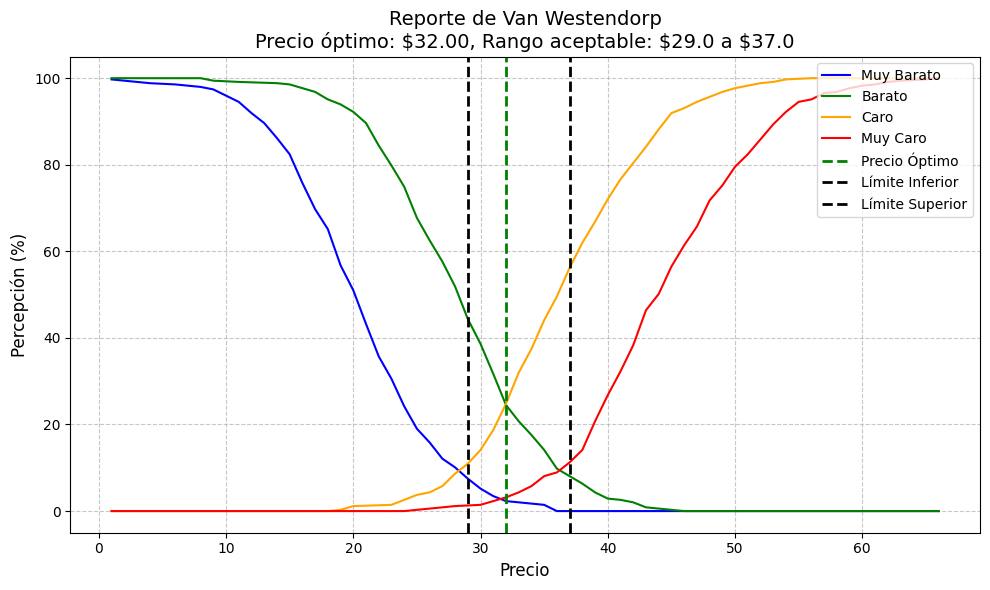

In [45]:
res1 = Van_Westendorp(df)
prod = ['buffet']

## Conclusión

- **Límite Inferior:** El precio más bajo aceptable es **S/. 29**, ya que cualquier reducción podría hacer que los consumidores cuestionen la calidad del café.
- **Límite Superior:** El precio más alto que los clientes estarían dispuestos a pagar es **S/. 37**, sin que el producto se perciba como excesivamente caro.

Con esta información, "Café Delicia" fijará el precio base en **S/. 32**, manteniendo la flexibilidad de ajustarlo dentro del rango de **S/. 29 a S/. 37** según las condiciones del mercado.

## Caso 2: Camaras

"VisionPro", una marca de tecnología de seguridad, ha lanzado su nueva línea de cámaras de seguridad inteligentes. Tras un análisis exhaustivo del mercado y las preferencias de los consumidores, se determinó que el **precio óptimo** para este dispositivo es de **S/. 185**, considerando sus características avanzadas como visión nocturna, detección de movimiento y conectividad con dispositivos móviles.

In [46]:
camaras = pd.read_csv('camaras.csv')

Precio óptimo: $185
Rango de precios aceptable: $170 a $206


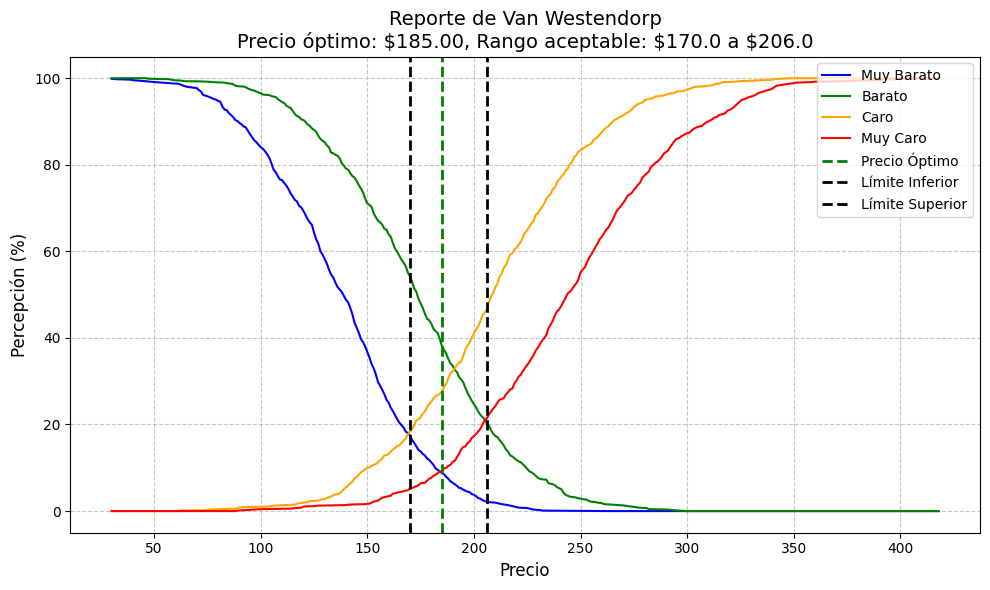

In [47]:
res2 = Van_Westendorp(camaras)
prod.append('camaras')

- **Límite Inferior:** El precio mínimo aceptable es **S/. 170**, ya que precios más bajos podrían afectar la percepción de calidad y las características premium de la cámara.
- **Límite Superior:** El precio máximo aceptable es **S/. 206**, siendo este el valor límite donde los consumidores aún consideran que el precio es justo para las funcionalidades y la tecnología ofrecida.

Con esta información, "VisionPro" fijará el precio base en **S/. 185**, con la opción de ajustarlo dentro del rango de **S/. 170 a S/. 206** según las estrategias comerciales y las condiciones del mercado.

## Caso 3: Te verde

"Té Verde Natural" ha lanzado una nueva variedad de té premium y, para garantizar su aceptación en el mercado, realizó un estudio exhaustivo de precios. Tras analizar las preferencias de los consumidores y la competencia, se identificó que el **precio óptimo** para este producto es de **S/. 32**, ya que los clientes perciben que refleja adecuadamente la calidad superior del té.

In [48]:
te = pd.read_csv('teverde.csv')

Precio óptimo: $32
Rango de precios aceptable: $29 a $37


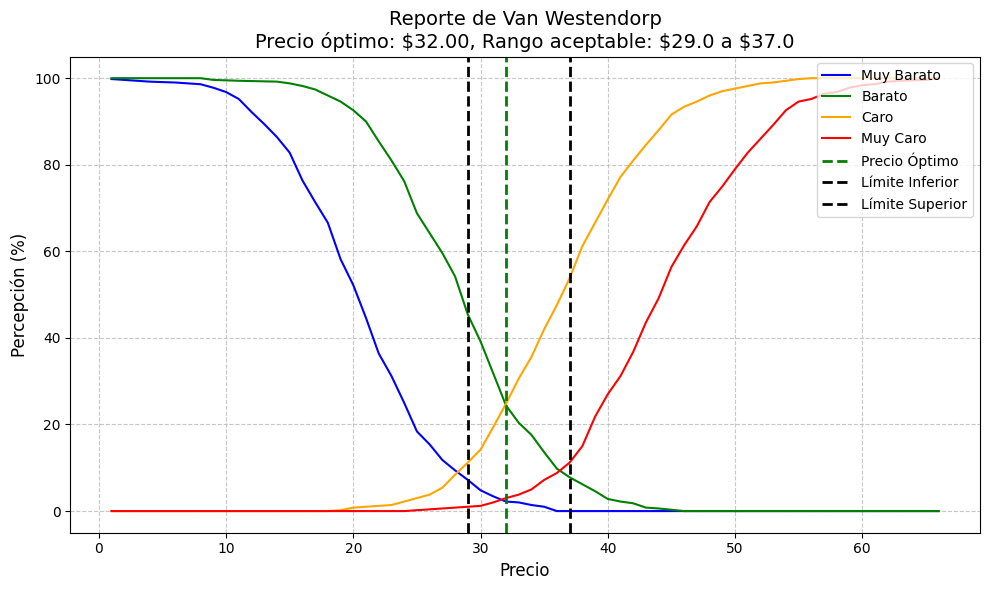

In [49]:
res3 = Van_Westendorp(te)
prod.append('te_verde')

- **Límite Inferior:** El precio mínimo aceptable es **S/. 29**, ya que un precio más bajo podría hacer que los consumidores duden de la calidad del producto.
- **Límite Superior:** El precio máximo aceptable es **$37**, siendo este el valor límite donde los consumidores aún perciben que el producto tiene un buen valor.

Con esta información, "Té Verde Natural" establecerá el precio base en **S/. 32**, con la opción de ajustarlo entre **S/. 29 y S/. 37** según las estrategias de marketing y las condiciones del mercado.

## Caso 4: Auriculares

"SonidoX", una marca líder en tecnología de audio, ha lanzado su nueva línea de auriculares inalámbricos de alta gama. Con el fin de posicionar el producto en el mercado y asegurarse de que los consumidores perciban el valor adecuado, se realizó un estudio de precios. El **precio óptimo** para los auriculares se estableció en **S/. 82**, un valor considerado justo para un producto que ofrece excelente calidad de sonido y tecnología avanzada.

In [50]:
auriculares = pd.read_csv('auriculares.csv')

Precio óptimo: $82
Rango de precios aceptable: $78 a $92


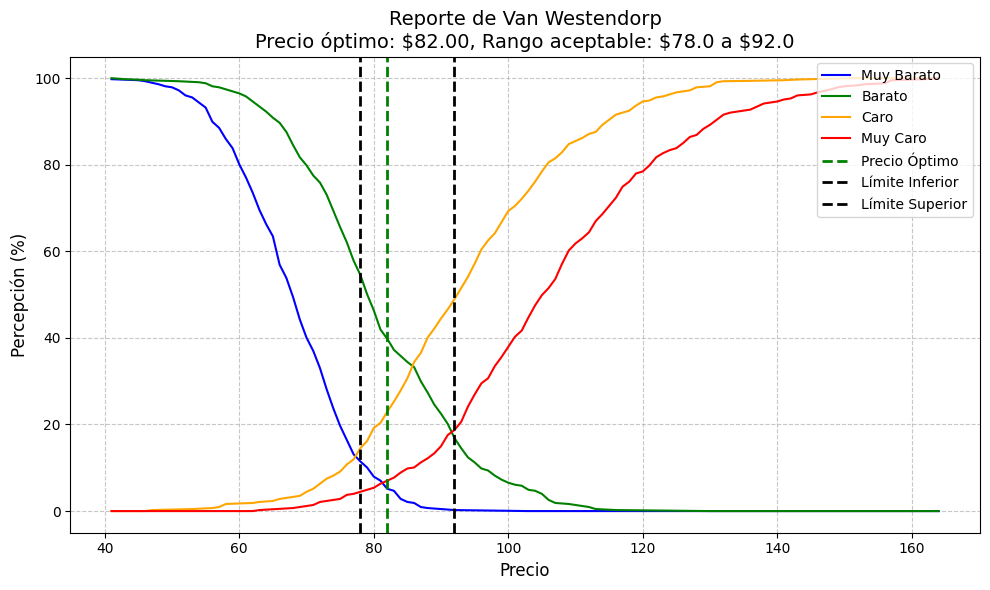

In [51]:
res4 = Van_Westendorp(auriculares)
prod.append('auriculares')

- **Límite Inferior:** El precio mínimo aceptable es **S/. 78**, ya que un precio más bajo podría generar dudas sobre la calidad del producto, especialmente al tratarse de tecnología de alta gama.
- **Límite Superior:** El precio máximo aceptable es **S/. 92**, siendo el valor límite donde los consumidores aún consideran que el precio está dentro de un rango razonable para la calidad que ofrece el producto.

Con esta información, "SonidoX" fijará el precio base en **S/. 82**, con la flexibilidad de ajustarlo dentro del rango de **S/. 78 a S/. 92** según las promociones, las condiciones del mercado o la competencia.

## Caso 5: Aceite

"Olea Premium" ha lanzado su nueva línea de aceite de oliva extra virgen, con el objetivo de atraer a consumidores que buscan productos de calidad superior a un precio accesible. Tras realizar un estudio de mercado, se determinó que el **precio óptimo** para este aceite es de **S/. 24**, ya que los consumidores perciben que este precio refleja adecuadamente la pureza y el proceso artesanal del producto.

In [52]:
aceite = pd.read_csv('aceite.csv')

Precio óptimo: $24
Rango de precios aceptable: $19 a $27


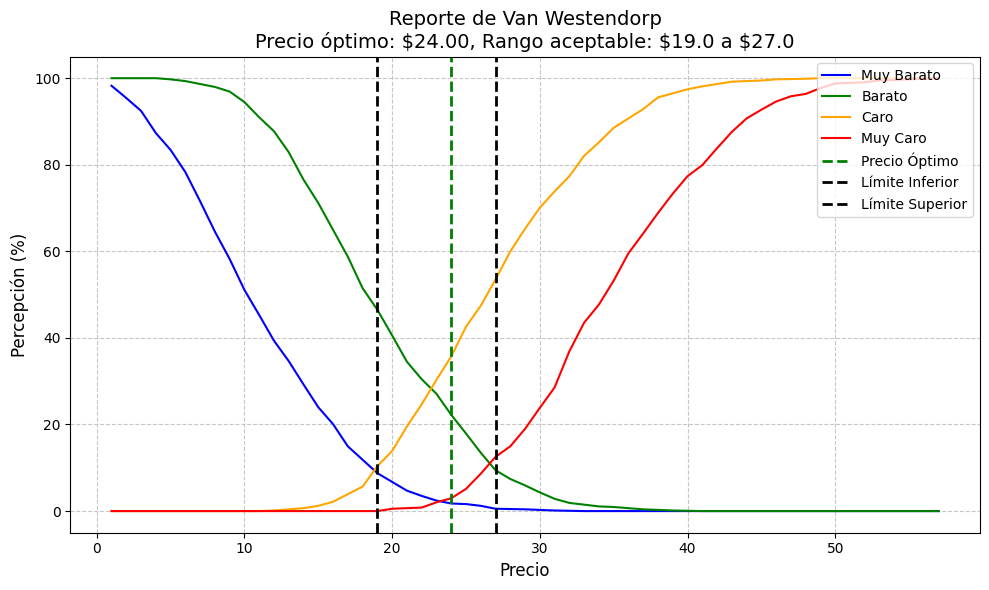

In [53]:
res5 = Van_Westendorp(aceite)
prod.append('aceite')

- **Límite Inferior:** El precio más bajo aceptable es **S/. 19**, ya que precios inferiores podrían generar dudas sobre la calidad del aceite.
- **Límite Superior:** El precio más alto aceptable es **S/. 27**, sin que los consumidores lo perciban como excesivamente caro.

Con esta información, "Olea Premium" fijará el precio base en **S/. 24**, manteniendo la flexibilidad de ajustarlo entre **S/. 19 y S/. 27** según las circunstancias del mercado y las campañas promocionales.

## Final

In [55]:
resultados = pd.DataFrame([res1,res2,res3,res4,res5],index=prod)
resultados.head()

,precio_optimo,lim_inf,lim_sup
buffet,32,29,37
camaras,185,170,206
te_verde,32,29,37
auriculares,82,78,92
aceite,24,19,27
